# 第6章 k平均法：教師なし学習モデルの基礎

## 6.1 k平均法によるクラスタリングと応用例

**[06KM-01]**

必要なモジュールをインポートします。

特に、画像データを扱うためにPILモジュールを利用します。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import randint
from PIL import Image

**[06KM-02]**

画像ファイル「photo.jpg」をダウンロードします。

In [2]:
!curl -OL https://github.com/enakai00/colab_mlbook/raw/main/photo.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   136  100   136    0     0   3675      0 --:--:-- --:--:-- --:--:--  3777
100 47187  100 47187    0     0   198k      0 --:--:-- --:--:-- --:--:--  198k


**[06KM-03]**

画像ファイル「photo.jpg」を読み込んで表示します。

白、赤、緑の3色を中心に構成された画像です。

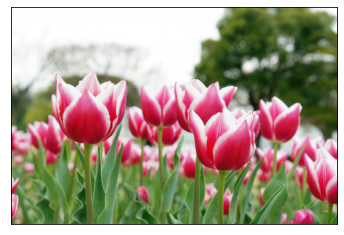

In [3]:
im = Image.open("photo.jpg")

fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xticks([])
subplot.set_yticks([])
_ = subplot.imshow(im)

**[06KM-04]**

画像データを各ピクセルの (R,G,B) を並べたリストに変換して、確認のためにリストの先頭部分を表示します。

In [4]:
pixels = list(im.convert('RGB').getdata())
pixels[:10]

[(251, 253, 252),
 (250, 252, 251),
 (250, 252, 251),
 (250, 252, 251),
 (251, 253, 252),
 (252, 254, 253),
 (253, 255, 254),
 (255, 255, 255),
 (254, 254, 254),
 (254, 254, 254)]

**[06KM-05]**

k平均法で「代表色」を決定する関数を用意します。

$k$ 個の代表色を決定して、各ピクセルを代表色に置き換えたリストを返します。

In [5]:
def run_kmeans(pixels, k):
  cls = [0] * len(pixels)

  # 代表色の初期値をランダムに設定
  centers = randint(256, size=(k, 3))
  print('Initial centers:')
  for c in centers:
    print('({:.2f}, {:.2f}, {:.2f})'.format(*c), end=' ')
  print('\n========================')
  distortion = float('inf')

  # 最大50回のIterationを実施
  for _ in range(50): 
    centers_new = np.zeros((k, 3))
    num_points = [0] * k
    distortion_new = 0.0

    # E Phase: 各データが属するグループ（代表色）を計算
    for pix, point in enumerate(pixels):
      point = np.array(point)
      dists = [np.dot(d, d) for d in centers - point]
      cls[pix] = np.argmin(dists)
      centers_new[cls[pix]] += point
      num_points[cls[pix]] += 1
      distortion_new += dists[cls[pix]]

    # M Phase: 新しい代表色を計算
    for i in range(k):
      if num_points[i] == 0:
        centers_new[i] = np.array([0, 0, 0])
      else:
        centers_new[i] = centers_new[i] / num_points[i]
    centers = centers_new
    for c in centers:
      print('({:.2f}, {:.2f}, {:.2f})'.format(*c), end=' ')
    print('\nDistortion: J={:.2f}'.format(distortion_new))

    # Distortion(J)の変化が0.1%未満になったら終了
    if distortion - distortion_new < distortion * 0.001:
        break
    distortion = distortion_new

  # 画像データの各ピクセルを代表色で置き換え
  new_pixels = []
  for pix in range(len(pixels)):
    new_pixels.append(tuple(centers[cls[pix]]))

  print("Done.")
  return list(map(lambda x: (int(x[0]), int(x[1]), int(x[2])), new_pixels))

**[06KM-06]**

例として、2つのクラスターに分類します。

In [6]:
result = run_kmeans(pixels, 2)

Initial centers:
(147.00, 18.00, 42.00) (213.00, 168.00, 84.00) 
(99.62, 75.29, 46.22) (199.39, 189.20, 177.85) 
Distortion: J=2966721687.00
(104.57, 92.24, 56.07) (225.47, 205.78, 208.38) 
Distortion: J=1197153417.66
(109.88, 95.58, 61.39) (232.43, 214.67, 219.09) 
Distortion: J=936903261.14
(112.13, 96.43, 63.40) (234.08, 218.31, 222.58) 
Distortion: J=903320287.91
(112.91, 96.73, 64.11) (234.58, 219.56, 223.71) 
Distortion: J=899219301.02
(113.17, 96.83, 64.35) (234.75, 219.98, 224.09) 
Distortion: J=898753757.38
Done.


**[06KM-07]**

結果を画像として表示します。

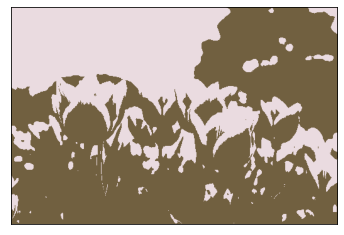

In [7]:
im.putdata(result)
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xticks([])
subplot.set_yticks([])
_ = subplot.imshow(im)

**[06KM-08]**

同様に3つのクラスターに分類します。

In [8]:
result = run_kmeans(pixels, 3)

Initial centers:
(27.00, 139.00, 33.00) (217.00, 201.00, 116.00) (211.00, 34.00, 133.00) 
(78.05, 105.50, 50.87) (219.24, 211.40, 206.36) (191.41, 50.20, 81.57) 
Distortion: J=1834951500.00
(85.09, 111.09, 57.34) (232.19, 220.66, 222.51) (190.67, 53.56, 82.16) 
Distortion: J=637316522.85
(86.64, 112.36, 58.99) (234.53, 223.79, 226.16) (191.76, 56.22, 84.97) 
Distortion: J=580154154.58
(86.90, 112.50, 59.24) (235.05, 224.86, 227.19) (192.34, 57.93, 86.56) 
Distortion: J=576243635.83
(86.89, 112.43, 59.20) (235.21, 225.26, 227.54) (192.56, 58.95, 87.39) 
Distortion: J=575721513.64
Done.


**[06KM-09]**

結果を画像として表示します。

「白、赤、緑」が抽出されていることがわかります。

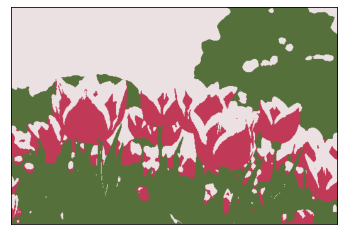

In [9]:
im.putdata(result)
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xticks([])
subplot.set_yticks([])
_ = subplot.imshow(im)